### Linear Regression - Medical Insurance

In [146]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



import pickle
import json

### 1. Problem Statement

In [ ]:
To predict Medical insurance charges by using below values:
'age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'

### 2. Data Gathering

In [147]:
df = pd.read_csv('medical_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [148]:
df.rename({'sex':'gender'},axis=1,inplace=True)
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [149]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 3. EDA and Feature Engineering

In [151]:
df.isna().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 3.1 age       

In [152]:
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

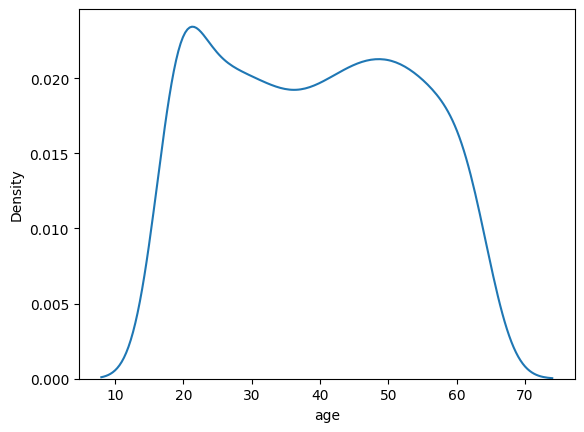

In [154]:
sns.kdeplot(df['age'])

#### 3.2 gender    

In [155]:
df['gender']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: gender, Length: 1338, dtype: object

In [156]:
df['gender'].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

In [157]:
df['gender'].value_counts().to_dict()

{'male': 676, 'female': 662}

In [158]:
df['gender'].replace({'male': 1, 'female': 0, 'MALE': 1, 'Female': 0, 'Male': 1}, inplace = True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_22644\2759780305.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'male': 1, 'female': 0, 'MALE': 1, 'Female': 0, 'Male': 1}, inplace = True)


In [159]:
df['gender']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: gender, Length: 1338, dtype: int64

In [160]:
df['gender'].value_counts()

gender
1    676
0    662
Name: count, dtype: int64

#### 3.3 bmi

In [161]:
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

<Axes: xlabel='bmi', ylabel='Density'>

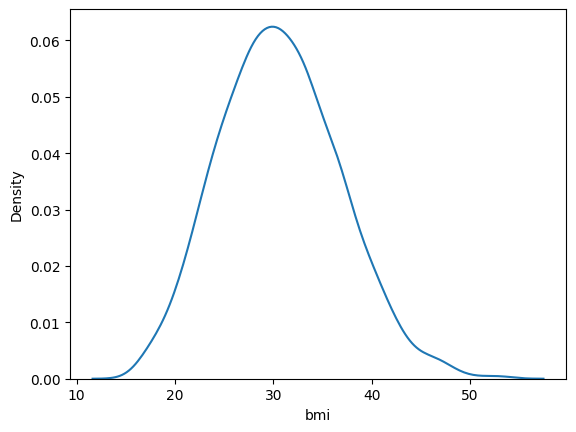

In [162]:
sns.kdeplot(df['bmi'])

In [163]:
df['bmi'].skew()

np.float64(0.2840471105987448)

#### 3.4 smoker

In [164]:
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [165]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [166]:
df['smoker'].replace({'no':0, 'yes':1}, inplace = True)
df

C:\Users\Hp\AppData\Local\Temp\ipykernel_22644\4232006623.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'].replace({'no':0, 'yes':1}, inplace = True)


,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [167]:
df['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

#### 3.5 region

In [168]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [169]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [170]:
df = pd.get_dummies(df,columns=['region'], dtype = int)


In [171]:
df

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


#### 3.6 children

In [172]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   gender            1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   int64  
 7   region_northwest  1338 non-null   int64  
 8   region_southeast  1338 non-null   int64  
 9   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


# 5 outliers

# 1.z_score

In [89]:
import pandas as pd
import numpy as np
from scipy import stats

In [94]:
cols = ['age','bmi','charges']
cols

['age', 'bmi', 'charges']

In [98]:
# cols = ['age','bmi','charges']
z_scores = np.abs(stats.zscore(df[cols]))
z_scores

array([[1.43876426, 0.45332   , 0.2985838 ],
       [1.50996545, 0.5096211 , 0.95368917],
       [0.79795355, 0.38330685, 0.72867467],
       ...,
       [1.50996545, 1.0148781 , 0.96159623],
       [1.29636188, 0.79781341, 0.93036151],
       [1.55168573, 0.26138796, 1.31105347]], shape=(1338, 3))

# 2.visualization method

<Axes: >

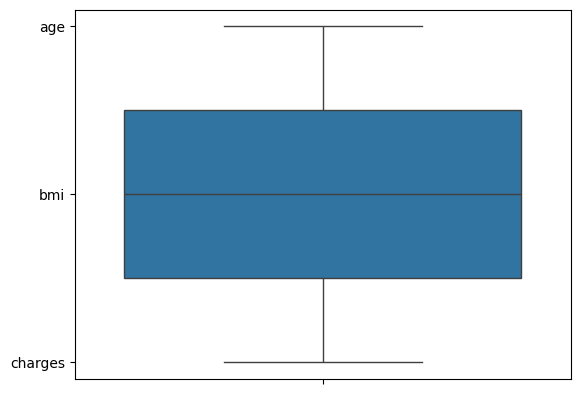

In [137]:
sns.boxplot(cols)

In [104]:
def z_scores(series):
    return np.abs(stats.zscore(series))

In [105]:
df_replaced = df.copy()
for col in cols:
    median_val=df[col].median()
    df_replaced[col]=np.where(z_scores(df[col])>3,median_val,df[col])
    print("original shape:",df.shape)
    print("shape after replacement:",df_replaced.shape)

original shape: (1338, 10)
shape after replacement: (1338, 10)
original shape: (1338, 10)
shape after replacement: (1338, 10)
original shape: (1338, 10)
shape after replacement: (1338, 10)


# 2.visualization method using boxplot

<Axes: >

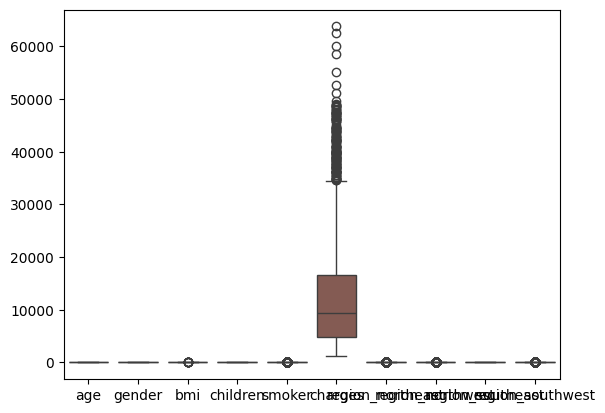

In [138]:
sns.boxplot(df)

# 2. IQR

### 5. Feature Selection and Extraction

### 6. Model Training

In [ ]:
1. Filter Method
2. Wrapper Method
3. Embedded Method

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   gender            1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   int64  
 7   region_northwest  1338 non-null   int64  
 8   region_southeast  1338 non-null   int64  
 9   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


# Train Test Split

In [175]:
x = df.drop('charges',axis = 1)
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=15)

In [177]:
x_test

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
38,35,1,36.67,1,1,1,0,0,0
126,19,0,28.30,0,1,0,0,0,1
479,23,1,32.56,0,0,0,0,1,0
10,25,1,26.22,0,0,1,0,0,0
195,19,1,30.59,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1059,32,1,33.82,1,0,0,1,0,0
303,28,0,33.00,2,0,0,0,1,0
335,64,1,34.50,0,0,0,0,0,1
792,22,0,23.18,0,0,1,0,0,0


In [178]:
 y_test

38      39774.2763
126     17081.0800
479      1824.2854
10       2721.3208
195      1639.5631
           ...    
1059     4462.7218
303      4349.4620
335     13822.8030
792      2731.9122
1213    10806.8390
Name: charges, Length: 268, dtype: float64

In [179]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [180]:
lin_reg_model.intercept_

np.float64(-12867.748835382099)

In [181]:
lin_reg_model.coef_

array([  261.96351497,    42.53287761,   339.51178314,   607.21007724,
       23878.98460102,   610.61863188,   216.02962359,  -463.0899505 ,
        -363.55830497])

In [182]:
x_test

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
38,35,1,36.67,1,1,1,0,0,0
126,19,0,28.30,0,1,0,0,0,1
479,23,1,32.56,0,0,0,0,1,0
10,25,1,26.22,0,0,1,0,0,0
195,19,1,30.59,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1059,32,1,33.82,1,0,0,1,0,0
303,28,0,33.00,2,0,0,0,1,0
335,64,1,34.50,0,0,0,0,0,1
792,22,0,23.18,0,0,1,0,0,0


### 7. Model Evaluation

##### Testing Data Evaluation

In [183]:
y_pred_test = lin_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_test)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_test, y_pred_test)
print("MAE :",mae)

r_squared = r2_score(y_test, y_pred_test)
print("R-squared :",r_squared)

MSE : 29856696.552684646
RMSE : 5464.128160345861
MAE : 3928.547809435483
R-squared : 0.7709928565663489


##### Training Data Evaluation

In [184]:
y_pred_train = lin_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r_squared = r2_score(y_train, y_pred_train)
print("R-squared :",r_squared)

MSE : 38229843.15836375
RMSE : 6183.028639620211
MAE : 4272.999226082078
R-squared : 0.7455479937467264


In [185]:
x.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [186]:
label_enc_data = {"smoker" : {'no': 0, 'yes': 1},
                "gender" : {'male':1, 'female':0}}

column_names = list(x_train.columns)
print(column_names)

['age', 'gender', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']


In [187]:
age = 34
gender = 'female' # 1
bmi =35.78
children = 2
smoker = "yes" # 1
region = 'northwest' # (0, 1, 0, 0)

In [188]:
label_enc_data['gender'][gender]

0

In [189]:
test_array = np.zeros((1,x_train.shape[1]))
test_array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [190]:
lin_reg_model.predict(x_test[45:46])

array([11239.45478649])

In [191]:
lin_reg_model.predict(x_test.head(1))

array([33890.21746398])

In [192]:
lin_reg_model.predict(test_array)

C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-12867.74883538])

In [193]:
test_array

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [194]:
age = 34
gender = 'female'
bmi =35.78
children = 2
smoker = "yes"
region = 'northwest'

In [195]:
region = 'region_' + region
region

'region_northwest'

In [196]:
print(column_names)

['age', 'gender', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']


In [197]:
test_array = np.zeros((1,x_train.shape[1]))

test_array[0,0] = age # 34
test_array[0,1] = label_enc_data['gender'][gender]
test_array[0,2] = bmi # 35.78
test_array[0,3] = children # 2
test_array[0,4] = label_enc_data['smoker'][smoker]

region = 'southwest'
region = f"region_{region}"  # 'region_' + region
region_index = column_names.index(region) # 6
print("region index :",region_index)
test_array[0,region_index] = 1
test_array

region index : 8


array([[34.  ,  0.  , 35.78,  2.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

In [198]:
prediction = lin_reg_model.predict(test_array)[0]
print('Predicted Price is:',np.around(prediction,3))

Predicted Price is: 32916.589


C:\Users\Hp\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Save Model

In [224]:
import pickle
import json

In [225]:
with open("medical.pkl","wb") as f:
    pickle.dump(lin_reg_model, f)

In [226]:
lin_reg_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [227]:
label_encode = {"smoker" : {'no': 0, 'yes': 1},
                "gender" : {'male':1, 'female':0}}

with open('label_encode.json', 'w') as f:
    json.dump(label_encode,f)

In [228]:
import pickle
pickle.dump(lin_reg_model,open("medical.pkl","wb"))